# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.9 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from collections import deque
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

# Import Unity game environment
from unityagents import UnityEnvironment

# Import DQN agent
from dqn_agent import Agent

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [5]:
# Define a training function
def train(n_episodes=800, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, checkpoint='checkpoint.pth'):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        checkpoint (str): name of the checkpoint file
    """
    scores = []
    scores_window = deque(maxlen=100)
    average_scores = []
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]       # reset the environment
        state = env_info.vector_observations[0]                 # get the current state
        score = 0                                               # initialize the score
        for t in range(max_t):
            action = agent.act(state, eps)                      # select an action
            env_info = env.step(action)[brain_name]             # send action to environment
            next_state = env_info.vector_observations[0]        # get the next state
            reward = env_info.rewards[0]                        # get the reward
            done = env_info.local_done[0]                       # see if episode has finished
            agent.step(state, action, reward, next_state, done) # learning step
            state = next_state                                  # roll over to next time step
            score += reward                                     # update the score
            if done:                                            # exit loop if episode finished
                break 
        scores_window.append(score)                    # save most recent score
        scores.append(score)                           # save most recent score
        average_scores.append(np.mean(scores_window))  # save most recent average score
        eps = max(eps_end, eps_decay*eps)              # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), checkpoint)
            break
    return scores, average_scores

In [6]:
# Define a plotting function
def plot_scores(scores, average_scores, title):
    """Plot the agent's rewards across training episodes.
    
    Params
    ======
        scores (float): scores obtained in each episode
        average_scores (float): mean value of scores over every 100 episodes
        title (str): title of the plot
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores, alpha=0.5)
    plt.plot(np.arange(len(scores)), average_scores, linewidth=1.5, c='r')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.title(title)
    plt.show()
    return fig

Episode 100	Average Score: 1.00
Episode 200	Average Score: 4.52
Episode 300	Average Score: 8.26
Episode 400	Average Score: 9.80
Episode 500	Average Score: 11.98
Episode 600	Average Score: 13.07
Episode 700	Average Score: 14.77
Episode 740	Average Score: 15.01
Environment solved in 640 episodes!	Average Score: 15.01
CPU times: user 6min 58s, sys: 31.4 s, total: 7min 29s
Wall time: 10min 33s


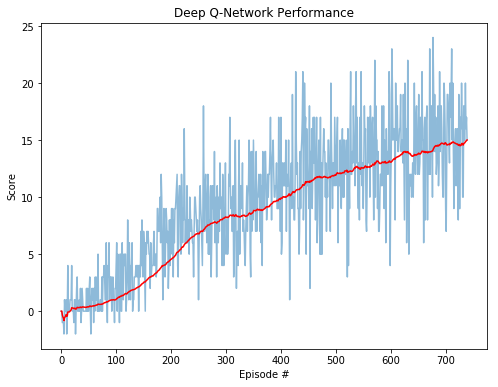

In [7]:
# Train a deep Q-network agent
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=64,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=False, dueling_dqn=False, prioritized_replay=False)
%time dqn_scores, dqn_avg_scores = train(checkpoint='checkpoint-dqn.pth')

# Plot the scores
figure = plot_scores(dqn_scores, dqn_avg_scores, 'Deep Q-Network Performance')

Episode 100	Average Score: 1.02
Episode 200	Average Score: 4.13
Episode 300	Average Score: 8.20
Episode 400	Average Score: 10.48
Episode 500	Average Score: 13.85
Episode 571	Average Score: 15.03
Environment solved in 471 episodes!	Average Score: 15.03
CPU times: user 5min 45s, sys: 25.6 s, total: 6min 11s
Wall time: 8min 36s


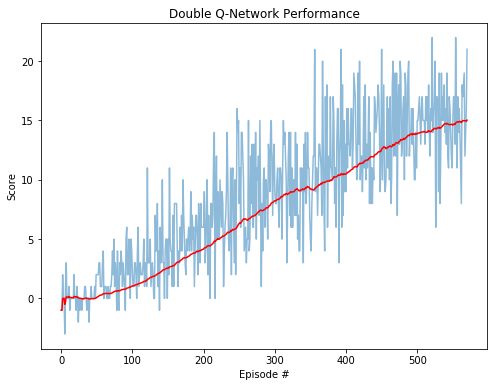

In [8]:
# Train a double Q-network agent
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=64,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=True, dueling_dqn=False, prioritized_replay=False)
%time ddqn_scores, ddqn_avg_scores = train(checkpoint='checkpoint-ddqn.pth')

# Plot the scores
figure = plot_scores(ddqn_scores, ddqn_avg_scores, 'Double Q-Network Performance')

Episode 100	Average Score: 0.83
Episode 200	Average Score: 4.78
Episode 300	Average Score: 8.09
Episode 400	Average Score: 10.45
Episode 500	Average Score: 13.60
Episode 600	Average Score: 14.56
Episode 632	Average Score: 15.02
Environment solved in 532 episodes!	Average Score: 15.02
CPU times: user 6min 33s, sys: 28.9 s, total: 7min 2s
Wall time: 9min 42s


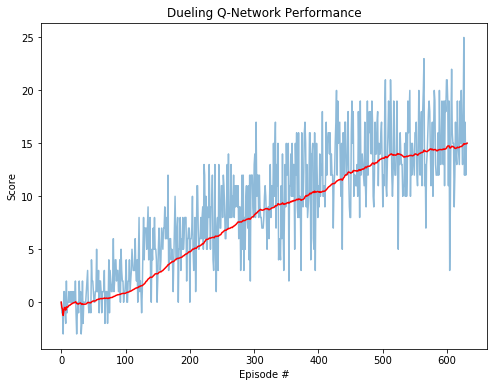

In [9]:
# Train a dueling Q-network agent
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=64,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=False, dueling_dqn=True, prioritized_replay=False)
%time duel_scores, duel_avg_scores = train(checkpoint='checkpoint-duel-dqn.pth')

# Plot the scores
figure = plot_scores(duel_scores, duel_avg_scores, 'Dueling Q-Network Performance')

Episode 100	Average Score: 0.71
Episode 200	Average Score: 3.35
Episode 300	Average Score: 7.30
Episode 400	Average Score: 9.69
Episode 500	Average Score: 12.46
Episode 600	Average Score: 13.68
Episode 659	Average Score: 15.02
Environment solved in 559 episodes!	Average Score: 15.02
CPU times: user 14min 22s, sys: 31.9 s, total: 14min 54s
Wall time: 18min 7s


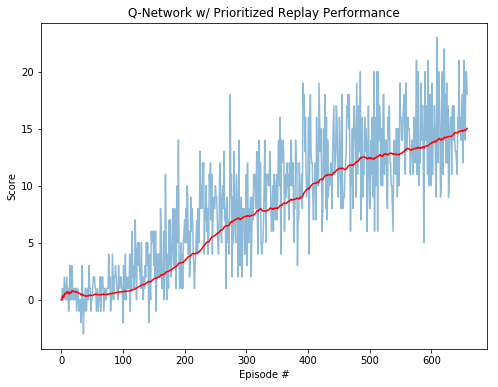

In [10]:
# Train a Q-network agent with a prioritized experience replay buffer
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=64,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=False, dueling_dqn=False, prioritized_replay=True)
%time per_scores, per_avg_scores = train(checkpoint='checkpoint-per-dqn.pth')

# Plot the scores
figure = plot_scores(per_scores, per_avg_scores, 
                     'Q-Network w/ Prioritized Replay Performance')

Episode 100	Average Score: 0.65
Episode 200	Average Score: 3.74
Episode 300	Average Score: 6.48
Episode 400	Average Score: 10.40
Episode 500	Average Score: 13.24
Episode 600	Average Score: 14.69
Episode 700	Average Score: 14.95
Episode 701	Average Score: 15.02
Environment solved in 601 episodes!	Average Score: 15.02
CPU times: user 7min 54s, sys: 34.1 s, total: 8min 28s
Wall time: 11min 37s


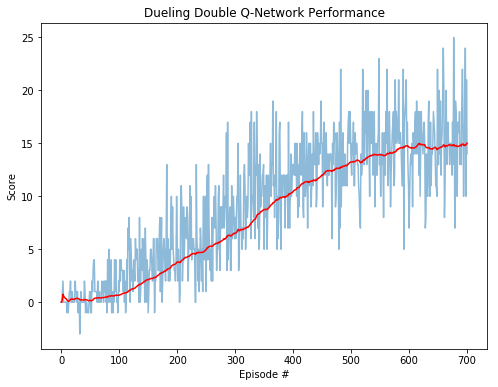

In [11]:
# Train a dueling double Q-network agent
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=64,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=True, dueling_dqn=True, prioritized_replay=False)
%time dddqn_scores, dddqn_avg_scores = train(checkpoint='checkpoint-dddqn.pth')

# Plot the scores
figure = plot_scores(dddqn_scores, dddqn_avg_scores, 'Dueling Double Q-Network Performance')

Episode 100	Average Score: 1.08
Episode 200	Average Score: 5.18
Episode 300	Average Score: 8.74
Episode 400	Average Score: 10.66
Episode 500	Average Score: 12.69
Episode 600	Average Score: 13.79
Episode 682	Average Score: 15.04
Environment solved in 582 episodes!	Average Score: 15.04
CPU times: user 15min 16s, sys: 34.8 s, total: 15min 51s
Wall time: 19min 16s


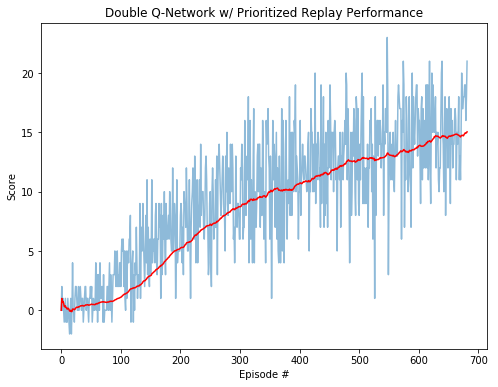

In [12]:
# Train a double Q-network agent with prioritized experience replay
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=64,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=True, dueling_dqn=False, prioritized_replay=True)
%time per_ddqn_scores, per_ddqn_avg_scores = train(checkpoint='checkpoint-per-ddqn.pth')

# Plot the scores
figure = plot_scores(per_ddqn_scores, per_ddqn_avg_scores, 'Double Q-Network w/ Prioritized Replay Performance')

Episode 100	Average Score: 1.21
Episode 200	Average Score: 4.43
Episode 300	Average Score: 7.67
Episode 400	Average Score: 10.51
Episode 500	Average Score: 11.95
Episode 600	Average Score: 14.04
Episode 689	Average Score: 15.00
Environment solved in 589 episodes!	Average Score: 15.00
CPU times: user 15min 47s, sys: 35.1 s, total: 16min 22s
Wall time: 19min 53s


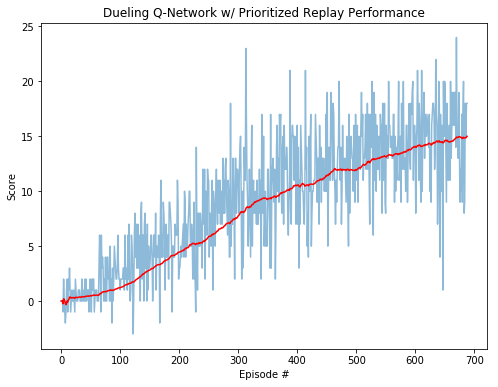

In [13]:
# Train a dueling Q-network agent with prioritized experience replay
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=64,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=False, dueling_dqn=True, prioritized_replay=True)
%time per_duel_scores, per_duel_avg_scores = train(checkpoint='checkpoint-per-duel-dqn.pth')

# Plot the scores
figure = plot_scores(per_duel_scores, per_duel_avg_scores, 'Dueling Q-Network w/ Prioritized Replay Performance')

Episode 100	Average Score: 0.80
Episode 200	Average Score: 4.50
Episode 300	Average Score: 8.01
Episode 400	Average Score: 10.86
Episode 500	Average Score: 12.49
Episode 600	Average Score: 14.22
Episode 700	Average Score: 14.52
Episode 740	Average Score: 15.00
Environment solved in 640 episodes!	Average Score: 15.00
CPU times: user 17min 27s, sys: 39.6 s, total: 18min 7s
Wall time: 21min 52s


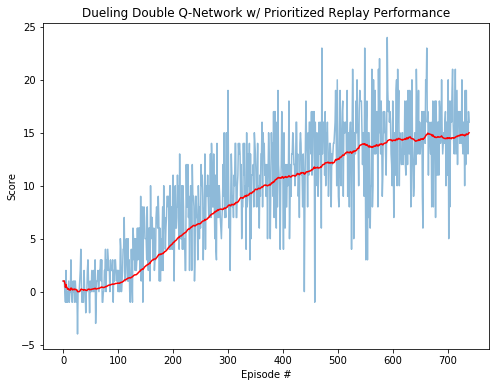

In [14]:
# Train a dueling double Q-network agent with prioritized experience replay
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=64,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=True, dueling_dqn=True, prioritized_replay=True)
%time per_dddqn_scores, per_dddqn_avg_scores = train(checkpoint='checkpoint-per-dddqn.pth')

# Plot the scores
figure = plot_scores(per_dddqn_scores, per_dddqn_avg_scores, 'Dueling Double Q-Network w/ Prioritized Replay Performance')

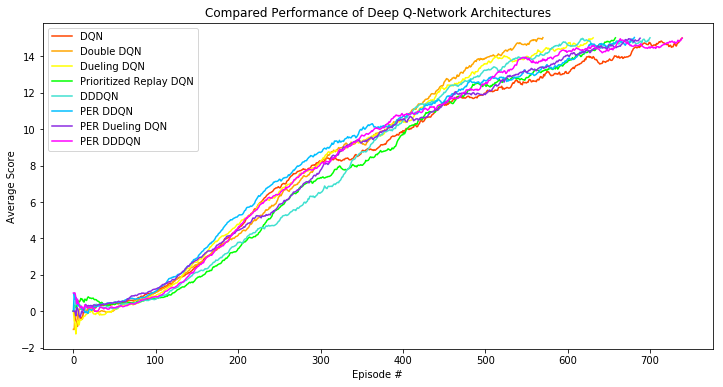

In [20]:
# Plot the average rewards and progress of all the agents
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(dqn_scores)), dqn_avg_scores, 
         color='orangered', label='DQN')
plt.plot(np.arange(len(ddqn_scores)), ddqn_avg_scores, 
         color='orange', label='Double DQN')
plt.plot(np.arange(len(duel_scores)), duel_avg_scores, 
         color='yellow', label='Dueling DQN')
plt.plot(np.arange(len(per_scores)), per_avg_scores, 
         color='lime', label='Prioritized Replay DQN')
plt.plot(np.arange(len(dddqn_scores)), dddqn_avg_scores, 
         color='turquoise', label='DDDQN')
plt.plot(np.arange(len(per_ddqn_scores)), per_ddqn_avg_scores, 
         color='deepskyblue', label='PER DDQN')
plt.plot(np.arange(len(per_duel_scores)), per_duel_avg_scores, 
         color='blueviolet', label='PER Dueling DQN')
plt.plot(np.arange(len(per_dddqn_scores)), per_dddqn_avg_scores, 
         color='magenta', label='PER DDDQN')
plt.ylabel('Average Score')
plt.xlabel('Episode #')
plt.title('Compared Performance of Deep Q-Network Architectures')
ax.legend()
plt.show()

In [21]:
fig.savefig('images/dqn-comparison.png')

Episode 100	Average Score: 3.28
Episode 200	Average Score: 10.01
Episode 300	Average Score: 12.44
Episode 400	Average Score: 13.58
Episode 440	Average Score: 15.08
Environment solved in 340 episodes!	Average Score: 15.08
CPU times: user 5min 8s, sys: 21 s, total: 5min 29s
Wall time: 7min 28s


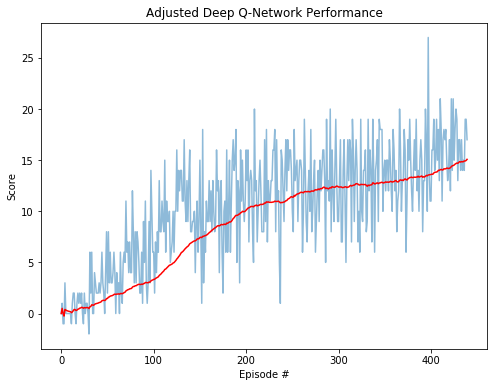

In [7]:
# Train a deep Q-network agent with updated hyperparameters
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=128,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=False, dueling_dqn=False, prioritized_replay=False)
%time dqn_scores, dqn_avg_scores = train(eps_decay=0.98, eps_end=0.02, checkpoint='checkpoint-dqn-2.pth')

# Plot the scores
figure = plot_scores(dqn_scores, dqn_avg_scores, 'Adjusted Deep Q-Network Performance')

Episode 100	Average Score: 2.09
Episode 200	Average Score: 6.96
Episode 300	Average Score: 11.49
Episode 400	Average Score: 14.02
Episode 436	Average Score: 15.02
Environment solved in 336 episodes!	Average Score: 15.02
CPU times: user 5min 25s, sys: 20.6 s, total: 5min 45s
Wall time: 7min 41s


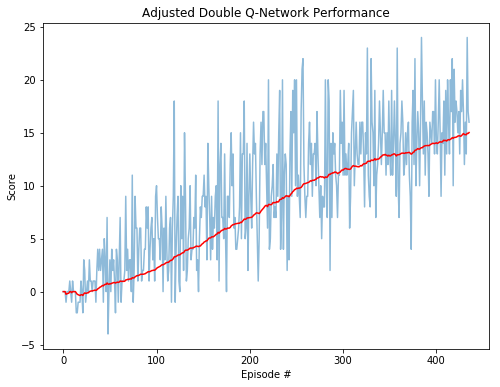

In [10]:
# Train a double Q-network agent with updated hyperparameters
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=128,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=True, dueling_dqn=False, prioritized_replay=False)
%time ddqn_scores, ddqn_avg_scores = train(eps_decay=0.98, eps_end=0.02, checkpoint='checkpoint-ddqn-2.pth')

# Plot the scores
figure = plot_scores(ddqn_scores, ddqn_avg_scores, 'Adjusted Double Q-Network Performance')

Episode 100	Average Score: 2.00
Episode 200	Average Score: 7.52
Episode 300	Average Score: 11.60
Episode 400	Average Score: 13.36
Episode 472	Average Score: 15.00
Environment solved in 372 episodes!	Average Score: 15.00
CPU times: user 5min 51s, sys: 22.9 s, total: 6min 14s
Wall time: 8min 17s


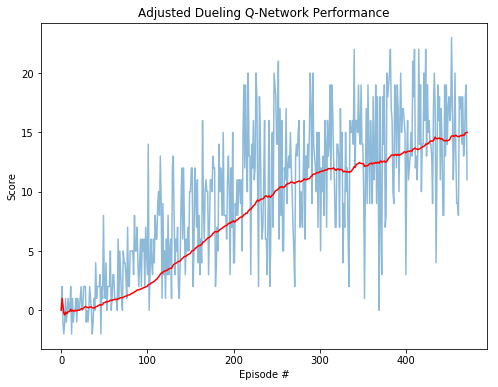

In [11]:
# Train a dueling Q-network agent with updated hyperparameters
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=128,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=False, dueling_dqn=True, prioritized_replay=False)
%time duel_scores, duel_avg_scores = train(eps_decay=0.98, eps_end=0.02, checkpoint='checkpoint-duel-dqn-2.pth')

# Plot the scores
figure = plot_scores(duel_scores, duel_avg_scores, 'Adjusted Dueling Q-Network Performance')

Episode 100	Average Score: 2.91
Episode 200	Average Score: 7.13
Episode 300	Average Score: 10.31
Episode 400	Average Score: 13.41
Episode 482	Average Score: 15.00
Environment solved in 382 episodes!	Average Score: 15.00
CPU times: user 10min 49s, sys: 24.2 s, total: 11min 13s
Wall time: 13min 34s


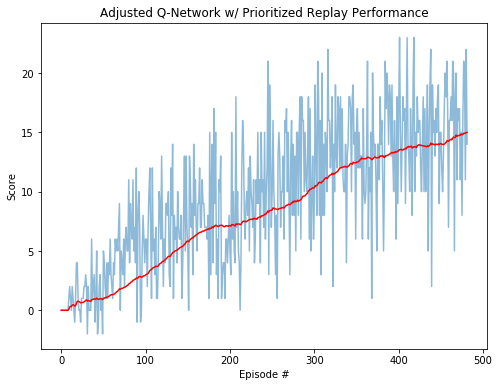

In [12]:
# Train a Q-network agent with prioritized experience replay buffer & updated hyperparameters
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=128,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=False, dueling_dqn=False, prioritized_replay=True)
%time per_scores, per_avg_scores = train(eps_decay=0.98, eps_end=0.02, checkpoint='checkpoint-per-dqn-2.pth')

# Plot the scores
figure = plot_scores(per_scores, per_avg_scores, 'Adjusted Q-Network w/ Prioritized Replay Performance')

Episode 100	Average Score: 0.81
Episode 200	Average Score: 5.77
Episode 300	Average Score: 12.13
Episode 400	Average Score: 13.82
Episode 500	Average Score: 15.03

Environment solved in 400 episodes!	Average Score: 15.03
CPU times: user 7min 27s, sys: 29 s, total: 7min 56s
Wall time: 10min 32s


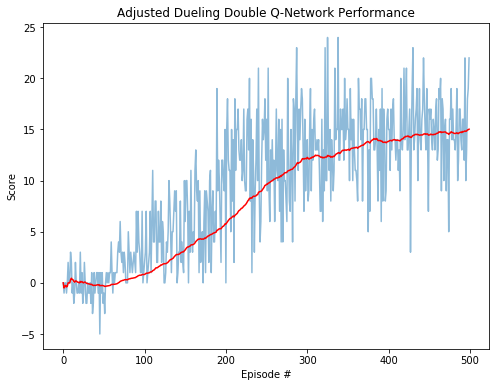

In [13]:
# Train a dueling double Q-network agent with updated hyperparameters
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=128,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=True, dueling_dqn=True, prioritized_replay=False)
%time dddqn_scores, dddqn_avg_scores = train(eps_decay=0.98, eps_end=0.02, checkpoint='checkpoint-dddqn-2.pth')

# Plot the scores
figure = plot_scores(dddqn_scores, dddqn_avg_scores, 'Adjusted Dueling Double Q-Network Performance')

Episode 100	Average Score: 1.67
Episode 200	Average Score: 2.71
Episode 300	Average Score: 5.32
Episode 400	Average Score: 10.46
Episode 500	Average Score: 14.17
Episode 600	Average Score: 13.83
Episode 700	Average Score: 13.89
Episode 755	Average Score: 15.04
Environment solved in 655 episodes!	Average Score: 15.04
CPU times: user 19min 34s, sys: 40.8 s, total: 20min 15s
Wall time: 24min 17s


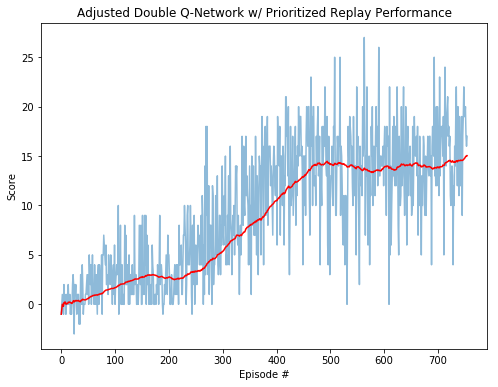

In [14]:
# Train a double Q-network agent with prioritized experience replay & updated hyperparameters
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=128,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=True, dueling_dqn=False, prioritized_replay=True)
%time per_ddqn_scores, per_ddqn_avg_scores = train(eps_decay=0.98, eps_end=0.02, checkpoint='checkpoint-per-ddqn-2.pth')

# Plot the scores
figure = plot_scores(per_ddqn_scores, per_ddqn_avg_scores, 'Adjusted Double Q-Network w/ Prioritized Replay Performance')

Episode 100	Average Score: 2.85
Episode 200	Average Score: 7.54
Episode 300	Average Score: 11.97
Episode 400	Average Score: 13.36
Episode 472	Average Score: 15.00
Environment solved in 372 episodes!	Average Score: 15.00
CPU times: user 11min 38s, sys: 27.7 s, total: 12min 5s
Wall time: 14min 45s


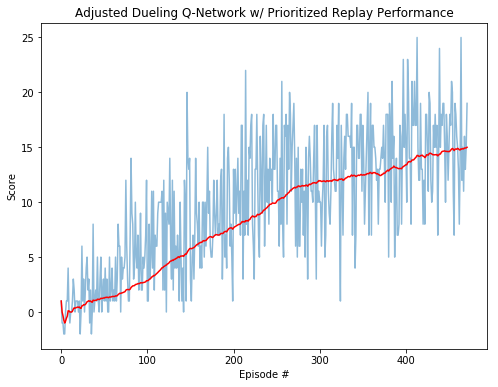

In [15]:
# Train a dueling Q-network agent with prioritized experience replay & updated hyperparameters
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=128,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=False, dueling_dqn=True, prioritized_replay=True)
%time per_duel_scores, per_duel_avg_scores = train(eps_decay=0.98, eps_end=0.02, checkpoint='checkpoint-per-duel-dqn-2.pth')

# Plot the scores
figure = plot_scores(per_duel_scores, per_duel_avg_scores, 'Adjusted Dueling Q-Network w/ Prioritized Replay Performance')

Episode 100	Average Score: 2.28
Episode 200	Average Score: 8.10
Episode 300	Average Score: 11.71
Episode 400	Average Score: 14.29
Episode 428	Average Score: 15.07
Environment solved in 328 episodes!	Average Score: 15.07
CPU times: user 10min 7s, sys: 24.2 s, total: 10min 31s
Wall time: 12min 42s


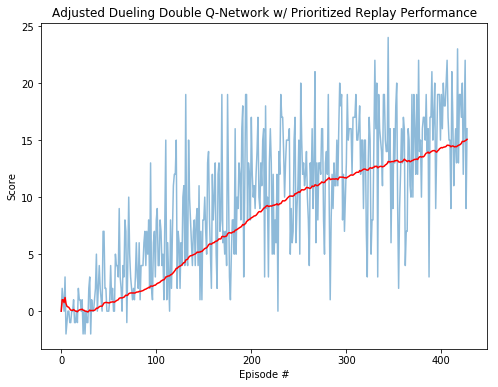

In [16]:
# Train a dueling double Q-network agent with prioritized experience replay & updated hyperparameters
agent = Agent(state_size=37, action_size=4, seed=0, buffer_size=int(1e5), batch_size=128,
              gamma=0.99, tau=1e-3, lr=5e-4, update_every=4, 
              double_dqn=True, dueling_dqn=True, prioritized_replay=True)
%time per_dddqn_scores, per_dddqn_avg_scores = train(eps_decay=0.98, eps_end=0.02, checkpoint='checkpoint-per-dddqn-2.pth')

# Plot the scores
figure = plot_scores(per_dddqn_scores, per_dddqn_avg_scores, 'Adjusted Dueling Double Q-Network w/ Prioritized Replay Performance')

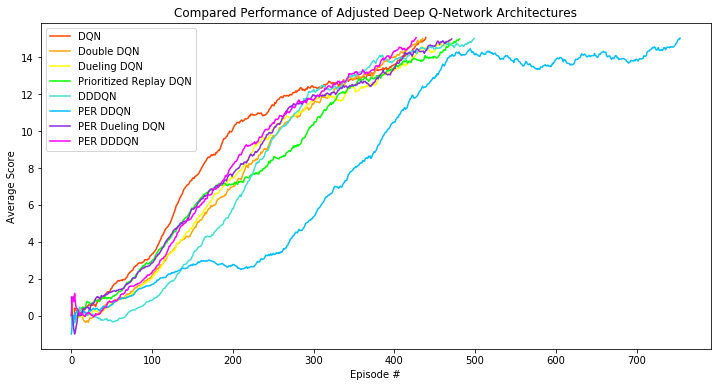

In [17]:
# Plot the average rewards and progress of all the agents
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(dqn_scores)), dqn_avg_scores, 
         color='orangered', label='DQN')
plt.plot(np.arange(len(ddqn_scores)), ddqn_avg_scores, 
         color='orange', label='Double DQN')
plt.plot(np.arange(len(duel_scores)), duel_avg_scores, 
         color='yellow', label='Dueling DQN')
plt.plot(np.arange(len(per_scores)), per_avg_scores, 
         color='lime', label='Prioritized Replay DQN')
plt.plot(np.arange(len(dddqn_scores)), dddqn_avg_scores, 
         color='turquoise', label='DDDQN')
plt.plot(np.arange(len(per_ddqn_scores)), per_ddqn_avg_scores, 
         color='deepskyblue', label='PER DDQN')
plt.plot(np.arange(len(per_duel_scores)), per_duel_avg_scores, 
         color='blueviolet', label='PER Dueling DQN')
plt.plot(np.arange(len(per_dddqn_scores)), per_dddqn_avg_scores, 
         color='magenta', label='PER DDDQN')
plt.ylabel('Average Score')
plt.xlabel('Episode #')
plt.title('Compared Performance of Adjusted Deep Q-Network Architectures')
ax.legend()
plt.show()

In [18]:
fig.savefig('images/adjusted-dqn-comparison.png')